# 4.9 Task: Part 2

In [1]:
#1: import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as ply
import seaborn as sns
import scipy

In [2]:
#set path
path = r'/Users/shelbysteele/Documents/Instacart Basket Anaysis-1022'

In [3]:
#import full instacart data
df_insta_full = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'insta_full.pkl'))

In [4]:
#check data structure
df_insta_full.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,num_of_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
#drop unneeded columns
df_insta_full.drop(columns = {'_merge'}, inplace = True)

In [7]:
#check data structure
df_insta_full.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


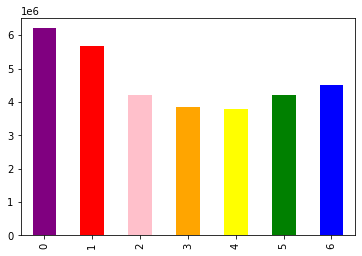

In [8]:
#2: Create a bar chart
bar = df_insta_full['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

<AxesSubplot:ylabel='Frequency'>

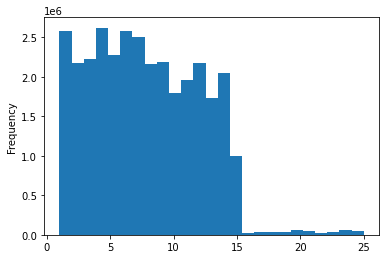

In [9]:
#creating a histogram
df_insta_full['prices'].plot.hist(bins = 25)

<AxesSubplot:ylabel='Frequency'>

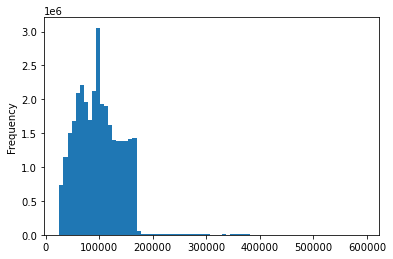

In [11]:
df_insta_full['income'].plot.hist(bins = 75)

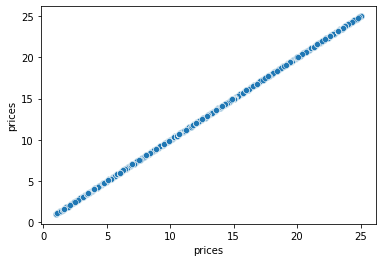

In [12]:
#creating a scatterplot 
scat = sns.scatterplot(x = 'prices', y = 'prices',data = df_insta_full) 

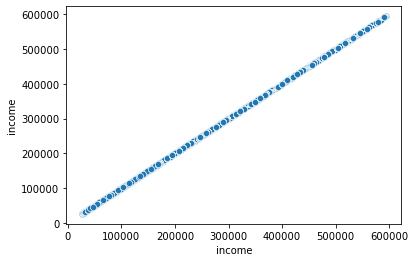

In [13]:
#creating a scatterplot 
scat = sns.scatterplot(x = 'income', y = 'income',data = df_insta_full) 

In [15]:
#creating a list of true/false for random sample
np.random.seed(4)
dev = np.random.rand(len(df_insta_full)) <= 0.7

In [17]:
#store 70% of the sample in the dataframe big
big = df_insta_full[dev]

In [18]:
#store 30% if the sample data in the small dataframe
small = df_insta_full[~dev]

In [19]:
#checking original dataframe structure
len(df_insta_full)

32404859

In [20]:
len(big)

22683761

In [21]:
len(small)

9721098

In [22]:
#checking the 2 sample dataframe equal the original dataframe structure
len(big) + len(small)

32404859

In [23]:
#using the small sample dataframe to filter out only the 'prices' and 'orders day of week' column
df_2 = small[['orders_day_of_week','prices']]

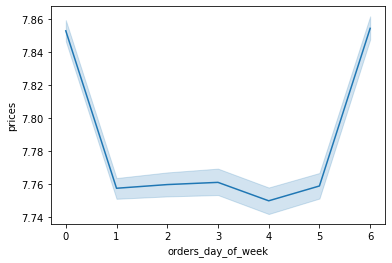

In [24]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

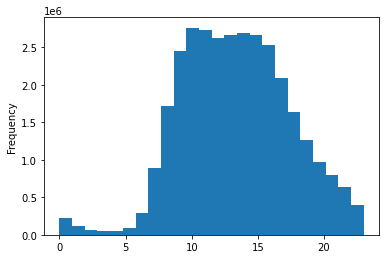

In [31]:
#3: The Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
hist = df_insta_full['order_hour_of_day'].plot.hist(bins = 24)

#### The histogram above represents all hours in a day (0 - 23 hours). Each column displays how many orders were placed during a certain timeframe. 

In [32]:
#saving histogram chart to file
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour.png'))

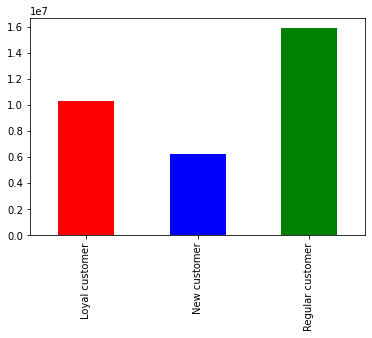

In [35]:
#4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.
bar = df_insta_full['loyalty_flag'].value_counts().sort_index().plot.bar(color = ['red', 'blue', 'green'])

In [36]:
#saving bar chart to file
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_bar.png'))

In [37]:
#5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.
df_3 = small[['order_hour_of_day','prices']]

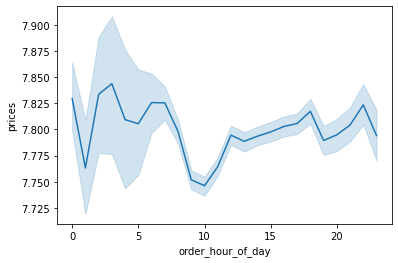

In [38]:
#creating a line chart
line2 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [39]:
#saving line chart to file
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hour.png'))

In [40]:
#6: Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents
df_4 = small[['age','num_of_dependants']]

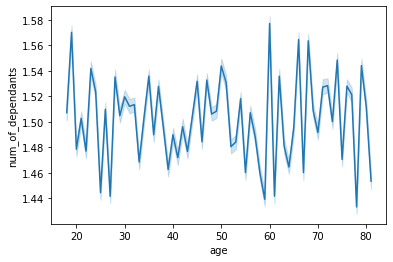

In [41]:
#creating a line chart
line3 = sns.lineplot(data = df_4, x = 'age',y = 'num_of_dependants')

#### The line chart shows the relationship between the age of the customers and how many dependants are in each family. 

In [47]:
#saving line chart to file
line3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

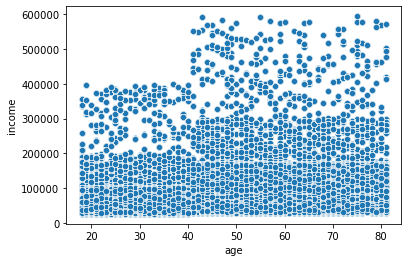

In [45]:
#7: Explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
scat2 = sns.scatterplot(x = 'age', y = 'income',data = df_insta_full) 

#### The scatterplot shows that as age increases, so does income. At minimum, all customers make at least 200,000, but around the age of 40, income increase up to 600,000. 

In [46]:
#saving scatterplot to file
scat2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_age_income.png'))

In [48]:
#9: export dataframe 
df_insta_full.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'insta_full2.pkl')) 